## Data Set

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import symbols, derive_by_array

In [2]:
x = np.array([0.45, 0.65, 0.7, 1, 1.25, 1.5, 2, 3, 3.8, 4.5, 5])  #1000 sq feet
y = np.array([1.7, 2, 2.5, 3, 4, 4.5, 7.5, 10, 15, 22, 30])     #Crore

## Cost Function

In [3]:
w,b = symbols('w b', real = True)
def cost(w,b):
    J = 1/(2*len(x))*np.sum((w*x + b - y)**2)
    return J**0.5

### We return partial differencial in format of sympy matrix as that is compatible for substitution of variables but not for computation in func grad, where we convert it to num.

## Gradient Descent

In [4]:
def grad(w, b, dJ_dw, dJ_db):
    alp = 0.1
    w = w - alp*dJ_dw
    b = b - alp*dJ_db
    return [w,b]

## Best fit

RMS Cost: 8.73860576181494

RMS Cost: 8.37484775543412

RMS Cost: 8.01354475854478

RMS Cost: 7.65501621787281

RMS Cost: 7.29963534329390

RMS Cost: 6.94783973497919

RMS Cost: 6.60014421615730

RMS Cost: 6.25715623674299

RMS Cost: 5.91959417135116

RMS Cost: 5.58830868517225

RMS Cost: 5.26430699096130

RMS Cost: 4.94877912185695

RMS Cost: 4.64312407617375

RMS Cost: 4.34897155853200

RMS Cost: 4.06819175039967

RMS Cost: 3.80288102165480

RMS Cost: 3.55530642702103

RMS Cost: 3.32778856047426

RMS Cost: 3.12250578657796

RMS Cost: 2.94121997998454

RMS Cost: 2.78495895956640

RMS Cost: 2.65373556898187

RMS Cost: 2.54640986938203

RMS Cost: 2.46077433711386

RMS Cost: 2.39385749065204

RMS Cost: 2.34234717083508

RMS Cost: 2.30299635554889

RMS Cost: 2.27291093750702

RMS Cost: 2.24969044226427

RMS Cost: 2.23144865304562

RMS Cost: 2.21676175941164

RMS Cost: 2.20458616966053

RMS Cost: 2.19417316505802


Slope: 4.34078916475967  Intercept: 0.764201774866400

No of iterations: 34

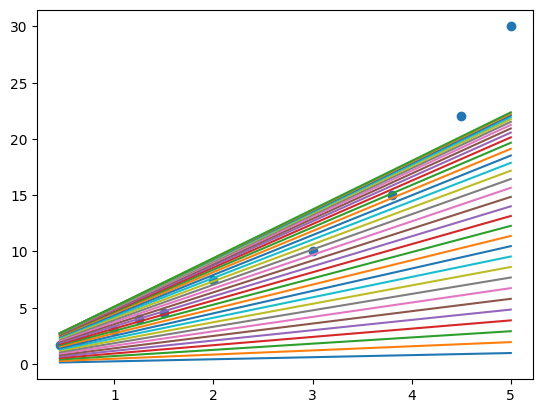

In [5]:
w1 = 0
b1 = 0
t = 0
prev_cost = 0
plt.scatter(x,y)
while True:
    t+=1
    w1,b1 = grad(w1, b1, derive_by_array(cost(w,b),w).subs(w,w1).subs(b,b1), derive_by_array(cost(w,b),b).subs(w,w1).subs(b,b1))
    if (abs(cost(w,b).subs(w,w1).subs(b,b1) - prev_cost) <= 0.01):
        break
    else:
        prev_cost = cost(w,b).subs(w,w1).subs(b,b1)
        print("RMS Cost:",prev_cost)
        print()
        plt.plot(x, w1*x + b1)
print("\nSlope:",w1," Intercept:",b1)
print("\nNo of iterations:",t)
plt.show()

## Error plot

In [ ]:
plt.figure()
ax = plt.axes(projection='3d')
plt.xlabel('w')
plt.ylabel('b')
ax.set_zlabel('J')
X = np.arange(-50,50,1)
Y = np.arange(-50,50,1)
w,b = np.meshgrid(X, Y)
m = len(w)
for i in range(m):
    for j in range(m):
        z = ((w[i]*w + b[j] - (w1*w + b1))**2)/(2*m)
        ax.plot_surface(w,b,z)